In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [254]:
df = pd.read_csv('../../datas/E4/C1-C4_formated.csv', sep=',')
len(df)
df.isna()

,Breaks,HP [R],O2 [R],CO2 [R],O2_MMOL [R],POIDS_1 [R],POIDS_2 [R],POIDS_3 [R],CO2_MMOL [R],DEFAUT_BP [B],...,TEMP_ENTREE_FOND_ECORIUM [R],TEMP_SORTIE_FOND_ECORIUM [R],BP_R134_EN_BARS [R],HP_R134_EN_BARS [R],BP_R134_EN_DEGRES [R],HP_R134_EN_DEGRES [R],CONSIGNE_BALLON_CHAUD [R],CONSIGNE_BALLON_FROID [R],TEMPERATURE_MEG_CHAUD [R],TEMPERATURE_MEG_FROID [R]
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763367,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
763368,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
763369,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
763370,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False


In [255]:
print(df.isna().sum() > 900000)


Breaks                       False
HP [R]                       False
O2 [R]                       False
CO2 [R]                      False
O2_MMOL [R]                  False
                             ...  
HP_R134_EN_DEGRES [R]        False
CONSIGNE_BALLON_CHAUD [R]    False
CONSIGNE_BALLON_FROID [R]    False
TEMPERATURE_MEG_CHAUD [R]    False
TEMPERATURE_MEG_FROID [R]    False
Length: 125, dtype: bool


In [256]:
df['ecart_temp'] = df['TEMPERATURE_CONSIGNE [R]'] - df['TEMPERATURE_REPRISE [R]']
df['alerte_temp'] = (df['ecart_temp'].abs() > 4).astype(int)


In [257]:
#df = df.dropna(subset=['ecart_temp'])
print(df['ecart_temp'].isna().sum())  # nombre de NaN dans y

367844


In [258]:
df.to_csv('../datas/E4/E4-C1_Altertes.csv' , sep=',')
len(df)

763372

In [259]:
df_bla = df.iloc[0:40000]
df_bla['alerte_temp'].size

40000

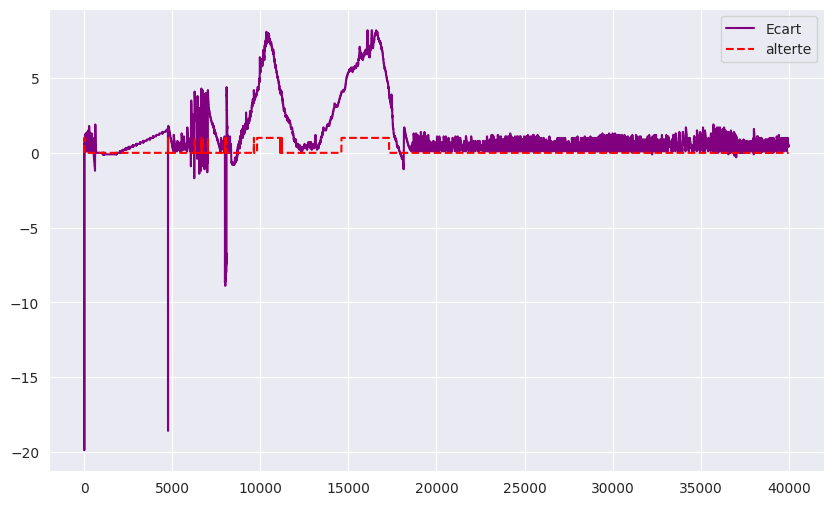

In [260]:

plt.figure(figsize=(10, 6))
#plt.plot(df['TEMPERATURE_REPRISE [R]'], label="TEMPERATURE_REPRISE", color="yellow")
#plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="TEMPERATURE_CONSIGNE", color="green")
plt.plot(df_bla['ecart_temp'], label="Ecart", color="purple")
plt.plot(df_bla['alerte_temp'], label="alterte", color="red", linestyle="dashed")
plt.legend()
plt.show()

In [261]:
df = pd.read_csv('../datas/E4/E4-C1_Altertes.csv', sep=',')
df.columns

index_erreur = df[df['alerte_temp'] == 1].index
print(len(index_erreur))
df['index'] = df.index

52825


In [262]:
print(index_erreur)

Index([     1,      2,      3,      4,      5,      6,   4756,   4757,   4758,
         4759,
       ...
       395518, 395519, 395520, 395521, 395522, 395523, 395524, 395525, 395526,
       395527],
      dtype='int64', length=52825)


In [263]:
# Initialise à 0
df['alerte_pred'] = 0

# Mets 1 là où alerte_temp == 1



In [264]:
for idx in index_erreur:
    start = idx - 300
    print(idx)
    df.loc[start:idx, 'alerte_pred'] = 1
df.loc[df['alerte_temp'] == 1, 'alerte_pred'] = 1

1
2
3
4
5
6
4756
4757
4758
4759
6266
6267
6268
6269
6270
6271
6272
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6715
6716
6717
6718
6719
6720
6721
6722
6723
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
9631
9632
9633
9634
9635
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
985

In [265]:
print(df.iloc[start:idx])

        Unnamed: 0  Breaks     HP [R]     O2 [R]  CO2 [R]  O2_MMOL [R]  \
395227      395227     NaN  40.935467  1638300.0    387.0          0.0   
395228      395228     NaN  40.674793  1638300.0    387.0          0.0   
395229      395229     NaN  40.674793  1638300.0    387.0          0.0   
395230      395230     NaN  40.660275  1638300.0    389.0          0.0   
395231      395231     NaN  40.660275  1638300.0    389.0          0.0   
...            ...     ...        ...        ...      ...          ...   
395522      395522     NaN  43.321869  1638300.0    391.0          0.0   
395523      395523     NaN  43.447361  1638300.0    393.0          0.0   
395524      395524     NaN  43.447361  1638300.0    393.0          0.0   
395525      395525     NaN  43.238075  1638300.0    391.0          0.0   
395526      395526     NaN  43.238075  1638300.0    391.0          0.0   

        POIDS_1 [R]  POIDS_2 [R]  POIDS_3 [R]  CO2_MMOL [R]  ...  \
395227   695.333333   641.666667   629.6666

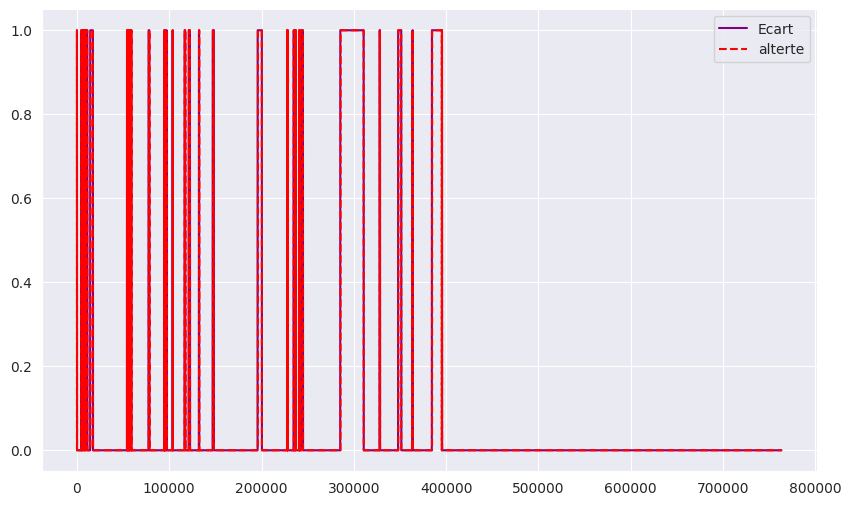

In [266]:
plt.figure(figsize=(10, 6))
#plt.plot(df['TEMPERATURE_REPRISE [R]'], label="TEMPERATURE_REPRISE", color="yellow")
#plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="TEMPERATURE_CONSIGNE", color="green")
plt.plot(df['alerte_pred'], label="Ecart", color="purple")
plt.plot(df['alerte_temp'], label="alterte", color="red", linestyle="dashed")
plt.legend()
plt.show()

In [267]:
len(df)

763372

In [9]:
df.to_csv('../datas/E4/E4-C1_Altertes_pred.csv', sep=',')

KeyboardInterrupt: 

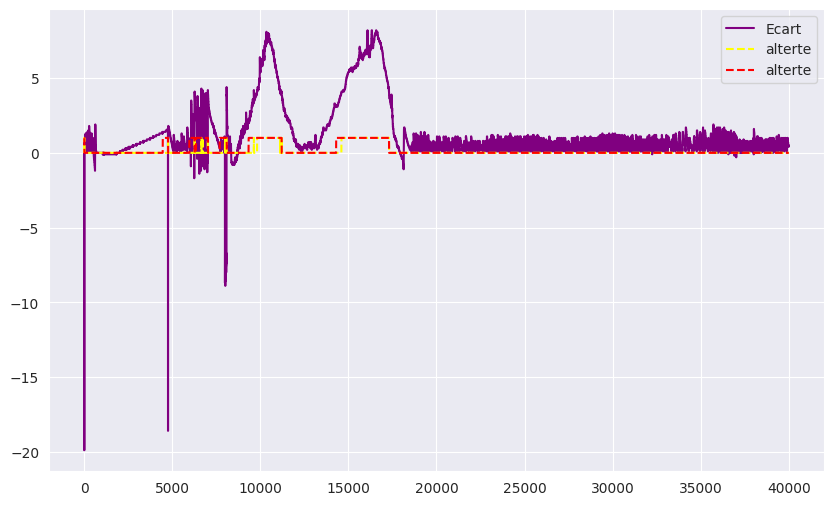

In [269]:
df_bla = df.iloc[0:40000]

plt.figure(figsize=(10, 6))
#plt.plot(df['TEMPERATURE_REPRISE [R]'], label="TEMPERATURE_REPRISE", color="yellow")
#plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="TEMPERATURE_CONSIGNE", color="green")
plt.plot(df_bla['ecart_temp'], label="Ecart", color="purple")

plt.plot(df_bla['alerte_temp'], label="alterte", color="yellow", linestyle="dashed")
plt.plot(df_bla['alerte_pred'], label="alterte", color="red", linestyle="dashed")
plt.legend()
plt.show()

In [10]:
import pandas as pd

df_1 = pd.read_csv('../datas/E4/E4-C1_Altertes_pred.csv', sep=',')

df_2 = pd.read_csv('../datas/E4_2/C4/C4_main_formated.csv', sep=',')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [12]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [22]:
df.to_csv('../datas/E4_all.csv', sep=',')

KeyboardInterrupt: 

In [26]:
import pandas as pd
df = pd.read_csv('../../datas/E4_all.csv', sep=',')
df = df.dropna(subset=['TEMPERATURE_REPRISE [R]'])
df = df.dropna(subset=['TEMPERATURE_CONSIGNE [R]'])
df = df.dropna(subset=['TEMPERATURE_MEG_FROID [R]'])

In [27]:
df['TEMPERATURE_MEG_FROID [R]']

Series([], Name: TEMPERATURE_MEG_FROID [R], dtype: float64)

In [18]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


# Appliquer KMeans (2 groupes ici)
features = ['TEMPERATURE_REPRISE [R]', 'TEMPERATURE_CONSIGNE [R]']
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])



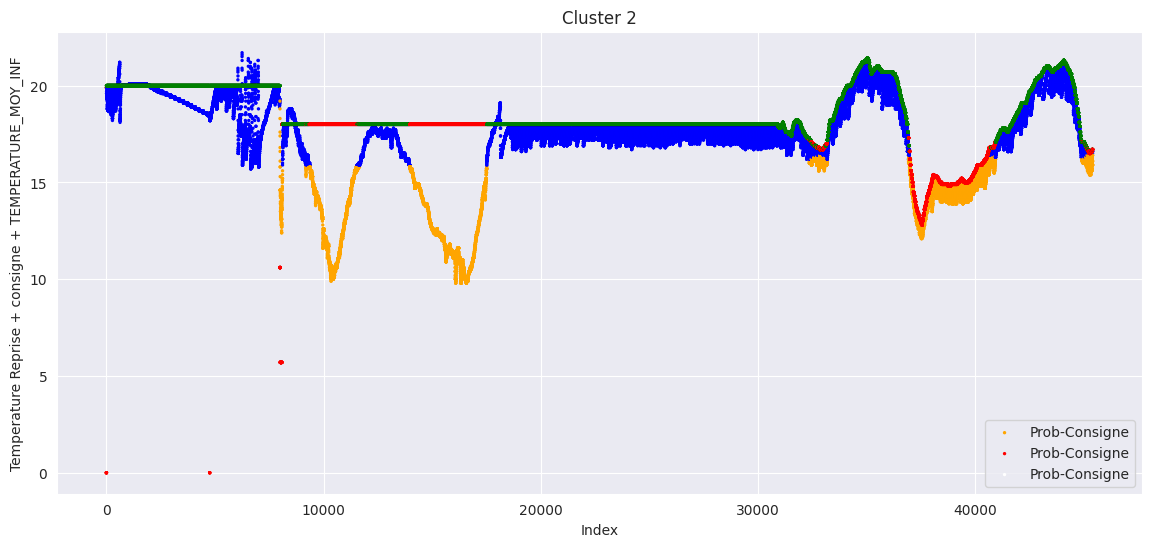

In [22]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Mapper une couleur par cluster
colors = df['cluster'].map({1: 'blue', 0: 'orange'})
colors_2 = df['cluster'].map({1: 'green', 0: 'red'})
colors_3 = df['cluster'].map({1: 'purple', 0: 'brown'})
colors_4 = df['cluster'].map({1: 'yellow', 0: 'white'})

# Tracer chaque variable (sur le même graphique) avec la couleur correspondant au cluster

#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors, label='Prob-Reprise', alpha=1.0, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_SUP [R]'], c=colors_2, label='Prob-Consigne', alpha=1.0, s=2)
plt.scatter(df.index, df['TEMPERATURE_REPRISE [R]'], c=colors, label='Prob-Consigne', alpha=1.0, s=2)
plt.scatter(df.index, df['TEMPERATURE_CONSIGNE [R]'], c=colors_2, label='Prob-Consigne', alpha=1.0, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors_3, label='Prob-Consigne', alpha=1.0, s=2)
plt.scatter(df.index, df['TEMPERATURE_MEG_CHAUD [R]'], c=colors_4, label='Prob-Consigne', alpha=1.0, s=2)
plt.title('Cluster 2')
plt.xlabel('Index')
plt.ylabel('Temperature Reprise + consigne + TEMPERATURE_MOY_INF' )
plt.legend()
plt.grid(True)
plt.show()


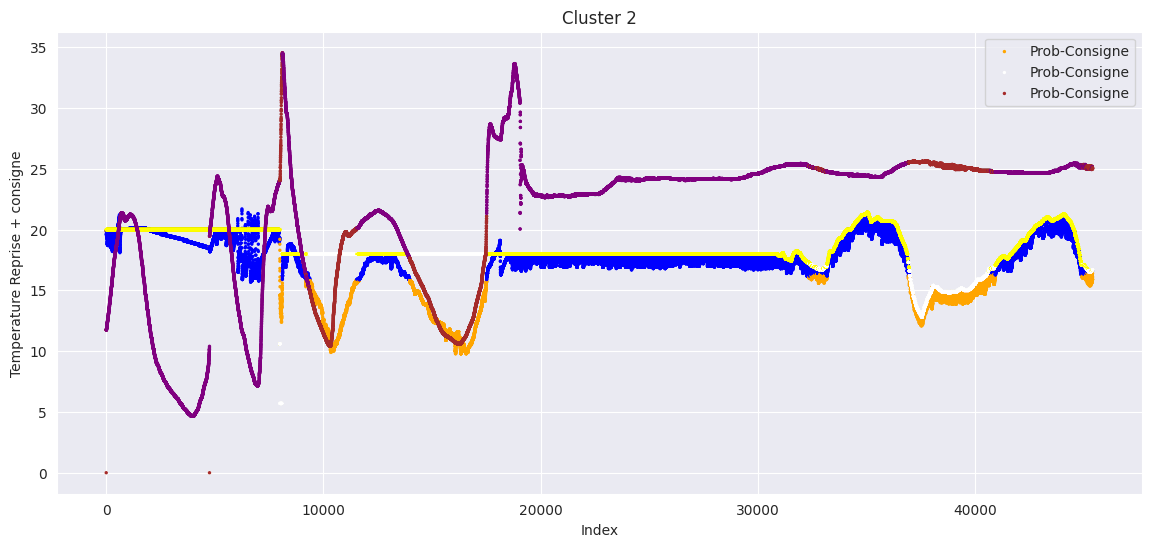

In [11]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Mapper une couleur par cluster
colors = df['cluster'].map({1: 'blue', 0: 'orange'})
colors_2 = df['cluster'].map({1: 'green', 0: 'red'})
colors_3 = df['cluster'].map({1: 'purple', 0: 'brown'})
colors_4 = df['cluster'].map({1: 'yellow', 0: 'white'})

# Tracer chaque variable (sur le même graphique) avec la couleur correspondant au cluster

#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors, label='Prob-Reprise', alpha=1.0, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_SUP [R]'], c=colors_2, label='Prob-Consigne', alpha=1.0, s=2)
plt.scatter(df.index, df['TEMPERATURE_REPRISE [R]'], c=colors, label='Prob-Consigne', alpha=1.0, s=2)
plt.scatter(df.index, df['TEMPERATURE_CONSIGNE [R]'], c=colors_4, label='Prob-Consigne', alpha=1.0, s=2)
plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors_3, label='Prob-Consigne', alpha=1.0, s=2)
#plt.scatter(df.index, df['alerte_pred'], c=colors_4, label='Prob-Consigne', alpha=1.0, s=2)
plt.title('Cluster 2')
plt.xlabel('Index')
plt.ylabel('Temperature Reprise + consigne' )
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['TEMPERATURE_CONSIGNE [R]'],
    df['TEMPERATURE_REPRISE [R]'],
    c=df['alerte_pred'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Consigne')
plt.ylabel('Température mesurée')
plt.title('Clustering avec KMeans')
plt.colorbar(label='Alterte Prédiction')
plt.grid(True)
plt.show()

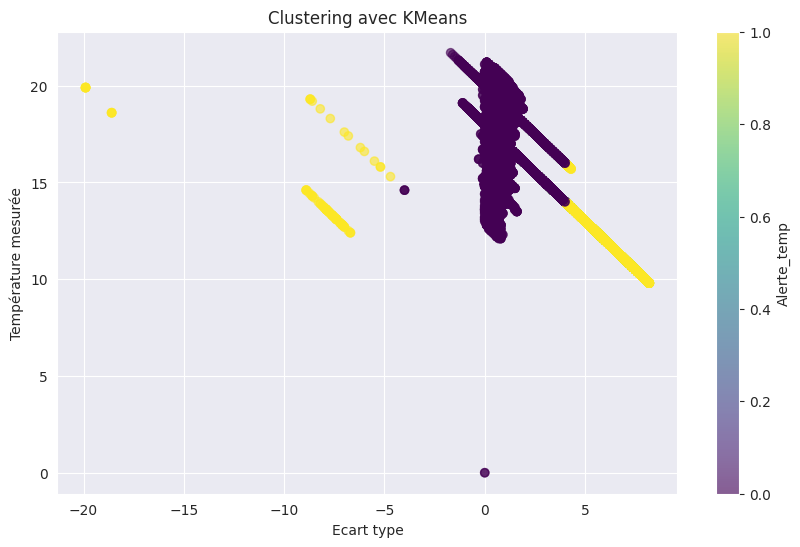

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['ecart_temp'],
    df['TEMPERATURE_REPRISE [R]'],
    c=df['alerte_temp'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Ecart type')
plt.ylabel('Température mesurée')
plt.title('Clustering avec KMeans')
plt.colorbar(label='Alerte_temp')
plt.grid(True)
plt.show()

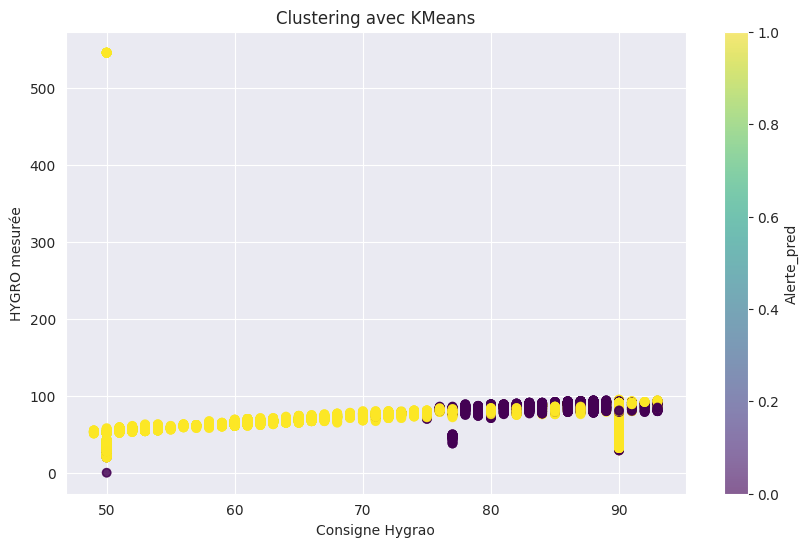

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['HYGROMETRIE_CONSIGNE [I]'],
    df['HYGROMETRIE_CELLULE [R]'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Consigne Hygrao')
plt.ylabel('HYGRO mesurée')
plt.title('Clustering avec KMeans')
plt.colorbar(label='Alerte_pred')
plt.grid(True)
plt.show()

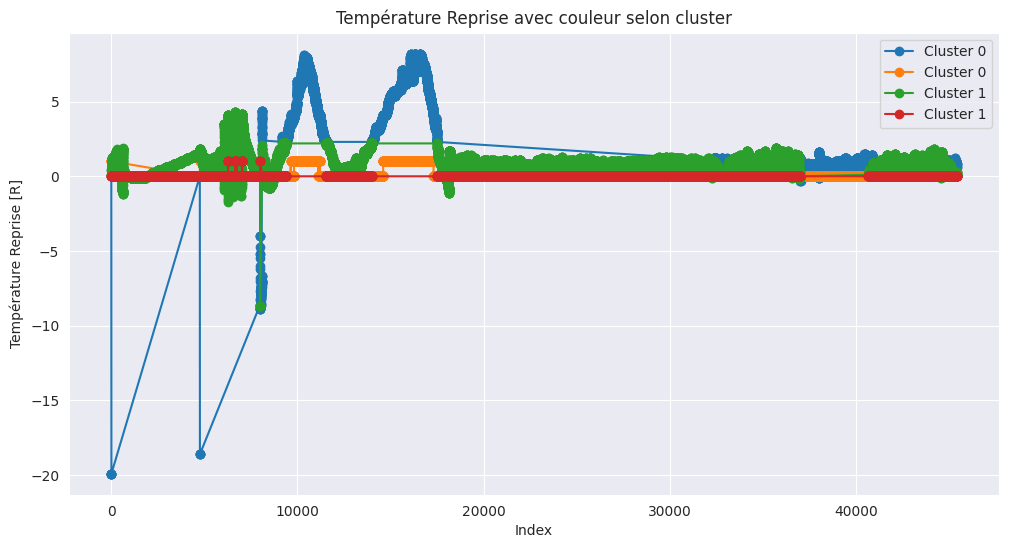

In [58]:
import matplotlib.pyplot as plt

# Courbe : Température Reprise en fonction de l'index
plt.figure(figsize=(12, 6))

for cluster_id in df['cluster'].unique():
    subset = df[df['cluster'] == cluster_id]
    plt.plot(
        subset.index,
        subset['ecart_temp'],
        subset['alerte_temp'],
        #subset['TEMPERATURE_REPRISE [R]'],
        label=f'Cluster {cluster_id}',
        marker='o',
        linestyle='-'
    )

plt.title('Température Reprise avec couleur selon cluster')
plt.xlabel('Index')
plt.ylabel('Température Reprise [R]')
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='TEMPERATURE_REPRISE [R]', ylabel='alerte_pred'>

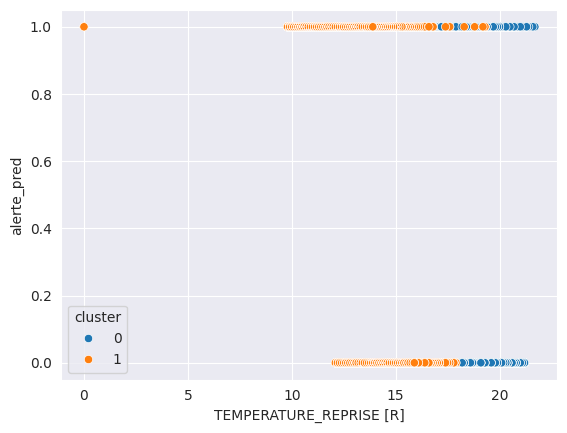

In [36]:
import seaborn as sns
sns.scatterplot(data=df,
                x='TEMPERATURE_REPRISE [R]',
                y='alerte_pred',
                hue='cluster',)

In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2486382846078054467
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2715615232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12873229773290384973
physical_device_desc: "device: 0, name: NVIDIA T400 4GB, pci bus id: 0000:0d:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


I0000 00:00:1754575269.007869   48657 gpu_device.cc:2019] Created device /device:GPU:0 with 2589 MB memory:  -> device: 0, name: NVIDIA T400 4GB, pci bus id: 0000:0d:00.0, compute capability: 7.5


In [4]:
import modin.pandas as pd

df = pd.read_csv('../../datas/E4_all.csv', sep=',')


Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Breaks',
       'HP [R]', 'O2 [R]', 'CO2 [R]', 'O2_MMOL [R]', 'POIDS_1 [R]',
       ...
       'CDE_EVAPO_BP_FROID [B]', 'CDE_VENTILATEUR_EVAPO [B]',
       'POMPE_MEG_FROID [B]', 'POMPE_MEG_CHAUD [B]',
       'RETOUR_LOCAL_DISTANT [B]', 'SECU_BALLON_CHAUD [B]',
       'SECU_BALLON_FROID [B]', 'CDE_COMPRESSEUR1 [B]', 'CDE_COMPRESSEUR2 [B]',
       'cluster'],
      dtype='object', length=162)

In [1]:
import pandas as pd

df = pd.read_csv("../datas/ECOLAB_3/E3_all_alert.csv")
df.to_parquet("../datas/ECOLAB_3/E3_all_alert.parquet", compression='snappy')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Simule des données
x = np.random.rand(10000, 10)
y = np.random.rand(10000, 1)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

tf.debugging.set_log_device_placement(True)
model.fit(x, y, epochs=5, batch_size=32)
